In [ ]:
!pip install pmdarima
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  font

In [ ]:
import pmdarima.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt

wine_data = datasets.load_wineind(True)
wine_df = pd.DataFrame(wine_data, columns=["wine_sales"])

wine_df.head()

,wine_sales
Jan 1980,15136.0
Feb 1980,16733.0
Mar 1980,20016.0
Apr 1980,17708.0
May 1980,18019.0


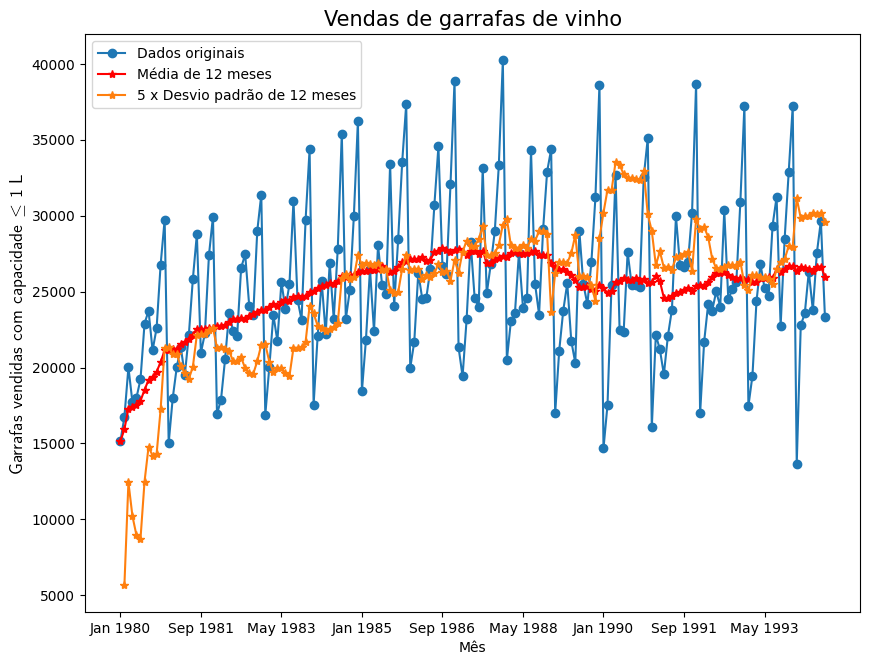

In [ ]:
window_length = 12

rolling_data = wine_df.rolling(window=window_length, min_periods=1)
plt.figure(figsize=(10, 7.5))
plt.plot(wine_df, marker='o', label="Dados originais")
plt.plot(rolling_data.mean(), marker='*', label=f"Média de {window_length} meses", color='r')
plt.plot(5*rolling_data.std(), marker='*', label=f"5 x Desvio padrão de {window_length} meses")
plt.title("Vendas de garrafas de vinho", fontsize = 15)
plt.xlabel("Mês")
plt.ylabel("Garrafas vendidas com capacidade $\leq$ 1 L", usetex = True, fontsize = 13)
# plt.axhline(y = wine_df.wine_sales.mean(), color='r', label="Média")
# plt.axhline(y = wine_df.wine_sales.median(), color='g', label="Mediana")
plt.xticks(wine_df.index[::20])
plt.legend()
plt.show()

In [ ]:
wine_df.describe()

,wine_sales
count,176.000000
mean,25392.147727
std,5340.821889
min,13652.000000
25%,22114.750000
50%,24669.000000
75%,28460.750000
max,40226.000000


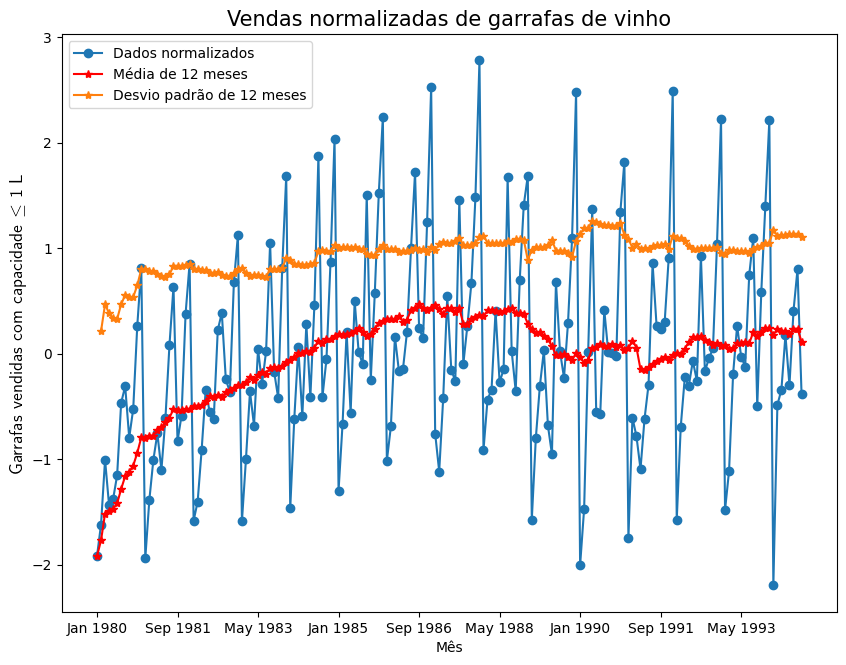

In [ ]:
mu = wine_df.wine_sales.mean()
sigma = wine_df.wine_sales.std()
normalized_data = (wine_df - mu)/sigma

rolling_normalized_data = normalized_data.rolling(window=window_length, min_periods=1)
plt.figure(figsize=(10, 7.5))
plt.plot(normalized_data, marker='o', label="Dados normalizados")
plt.plot(rolling_normalized_data.mean(), marker='*', label=f"Média de {window_length} meses", color='r')
plt.plot(rolling_normalized_data.std(), marker='*', label=f"Desvio padrão de {window_length} meses")
plt.title("Vendas normalizadas de garrafas de vinho", fontsize = 15)
plt.xlabel("Mês")
plt.ylabel("Garrafas vendidas com capacidade $\leq$ 1 L", usetex = True, fontsize = 13)
# plt.axhline(y = wine_df.wine_sales.mean(), color='r', label="Média")
# plt.axhline(y = wine_df.wine_sales.median(), color='g', label="Mediana")
plt.xticks(wine_df.index[::20])
plt.legend()
plt.show()

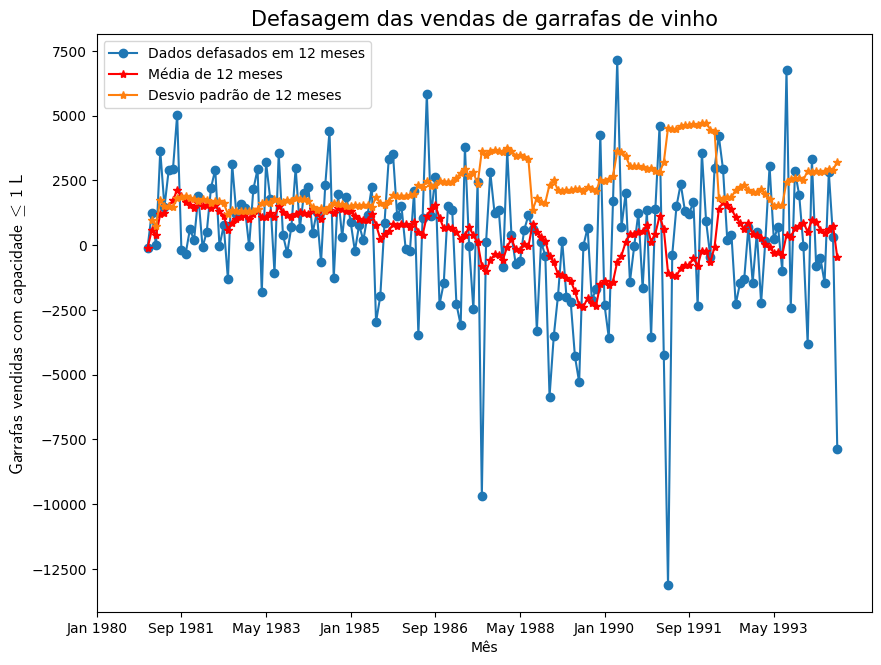

In [ ]:
lagged_data = wine_df - wine_df.shift(window_length)

rolling_lagged_data = lagged_data.rolling(window=window_length, min_periods=1)
plt.figure(figsize=(10, 7.5))
plt.plot(lagged_data, marker='o', label=f"Dados defasados em {window_length} meses")
plt.plot(rolling_lagged_data.mean(), marker='*', label=f"Média de {window_length} meses", color='r')
plt.plot(rolling_lagged_data.std(), marker='*', label=f"Desvio padrão de {window_length} meses")
plt.title("Defasagem das vendas de garrafas de vinho", fontsize = 15)
plt.xlabel("Mês")
plt.ylabel("Garrafas vendidas com capacidade $\leq$ 1 L", usetex = True, fontsize = 13)
# plt.axhline(y = wine_df.wine_sales.mean(), color='r', label="Média")
# plt.axhline(y = wine_df.wine_sales.median(), color='g', label="Mediana")
plt.xticks(wine_df.index[::20])
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(wine_df, autolag='AIC')
print(dftest)
for k, v in dftest[4].items():
    print("\t{}: {} - The data is{} stationary with {}% confidence".format(k, v, " not" if v<dftest[0] else "", 100-int(k[:-1])))

normalized_dftest = adfuller(normalized_data)
print(normalized_dftest)
for k, v in normalized_dftest[4].items():
    print("\t{}: {} - The data is{} stationary with {}% confidence".format(k, v, " not" if v<normalized_dftest[0] else "", 100-int(k[:-1])))

lagged_dftest = adfuller(lagged_data.dropna())
print(lagged_dftest)
for k, v in lagged_dftest[4].items():
    print("\t{}: {} - The data is{} stationary with {}% confidence".format(k, v, " not" if v<lagged_dftest[0] else "", 100-int(k[:-1])))

(-2.8524676199606573, 0.05116115205187666, 11, 164, {'1%': -3.47086589632514, '5%': -2.879330279087651, '10%': -2.57625492712671}, 3004.5684392973585)
	1%: -3.47086589632514 - The data is not stationary with 99% confidence
	5%: -2.879330279087651 - The data is not stationary with 95% confidence
	10%: -2.57625492712671 - The data is stationary with 90% confidence
(-2.852467619960667, 0.051161152051875415, 11, 164, {'1%': -3.47086589632514, '5%': -2.879330279087651, '10%': -2.57625492712671}, 240.79902344190907)
	1%: -3.47086589632514 - The data is not stationary with 99% confidence
	5%: -2.879330279087651 - The data is not stationary with 95% confidence
	10%: -2.57625492712671 - The data is stationary with 90% confidence
(-2.622084973097279, 0.08851811614166566, 14, 149, {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}, 2775.441263747631)
	1%: -3.4750180242954167 - The data is not stationary with 99% confidence
	5%: -2.8811408028842043 - The data is not 

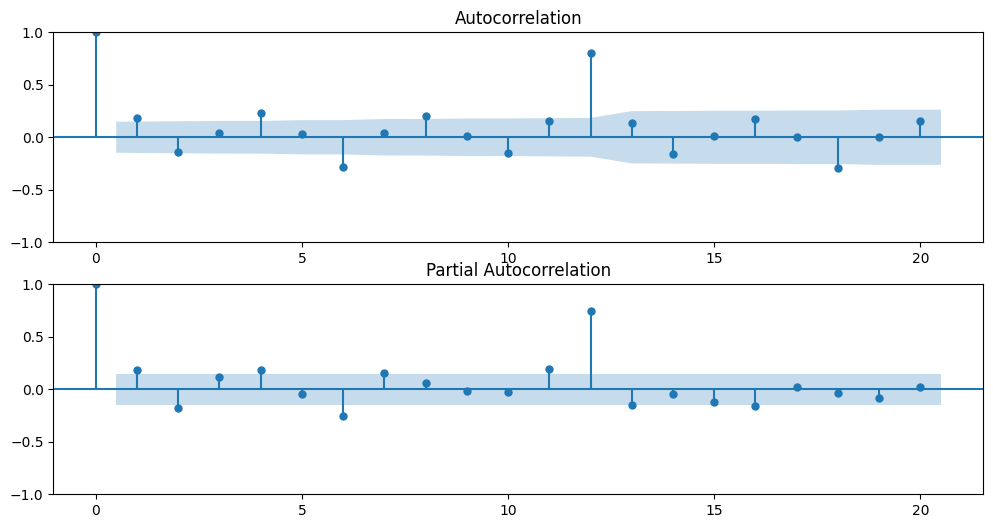

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(normalized_data, ax=ax[0], lags=20)
ax[1] = plot_pacf(normalized_data, ax=ax[1], lags=20)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/seasonality.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  detrend = _decomposer_helper(x[sma_xs], trend)


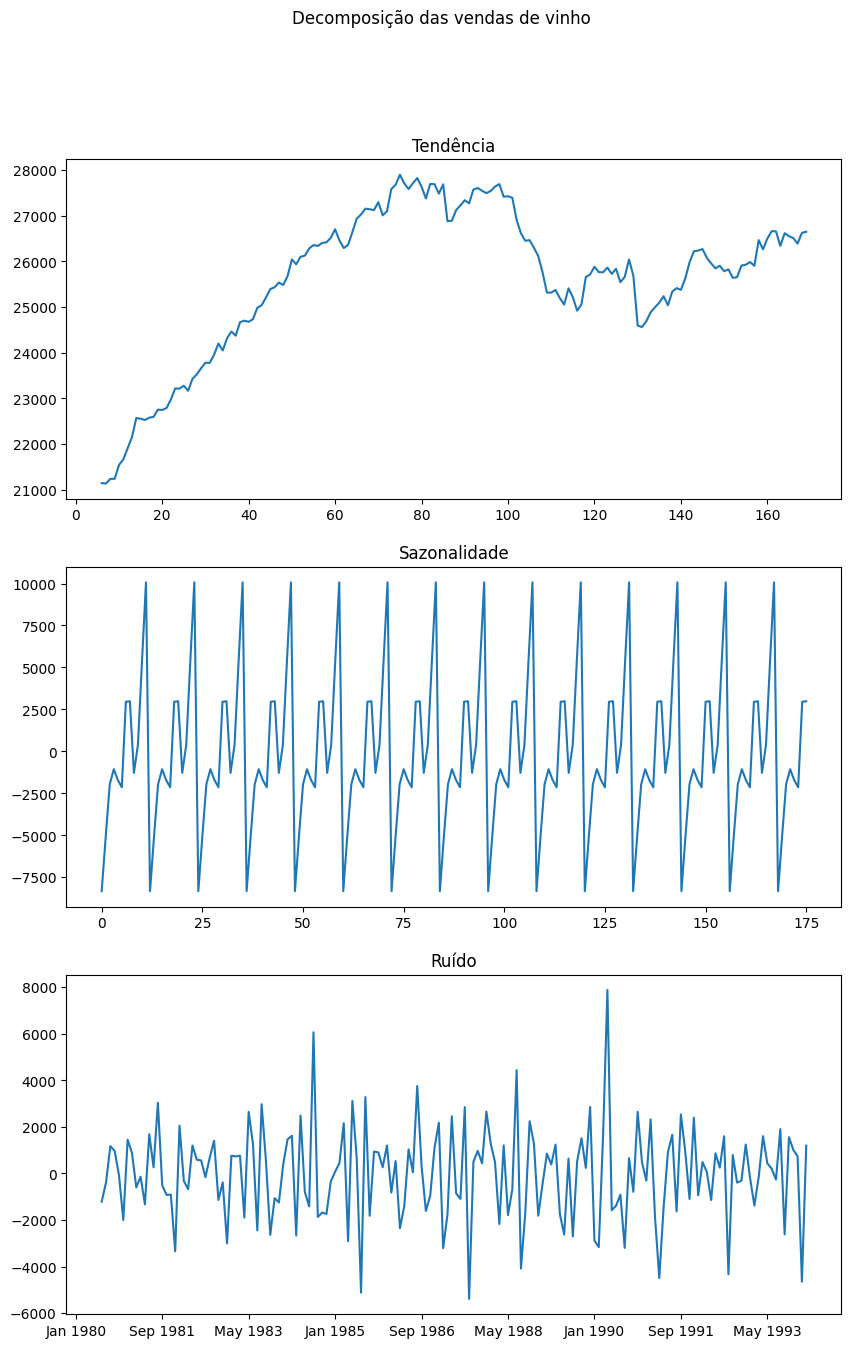

In [ ]:
from pmdarima.arima import decompose

decomposed = decompose(wine_df.wine_sales, type_="additive", m = window_length)

fig, ax = plt.subplots(3, figsize=(10, 15))
fig.suptitle("Decomposição das vendas de vinho")
ax[0].plot(decomposed.trend)
ax[0].set_title("Tendência")
ax[1].plot(decomposed.seasonal)
ax[1].set_title("Sazonalidade")
ax[2].plot(decomposed.random)
ax[2].set_title("Ruído")
plt.xticks(wine_df.index[::20])
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing, HoltWintersResults
from datetime import date, datetime

train_size = int(0.7*wine_df.shape[0])

date_wine_df = wine_df.copy()
date_wine_df.index = date_wine_df.index.map(lambda month : datetime.strptime(month, "%b %Y")) # strptime inverte a strftime
train_data = date_wine_df[:train_size]
forecast_range_length = date_wine_df.shape[0]-train_size

holt_winters_model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
holt_winters_model_fit = holt_winters_model.fit(optimized=True)
holt_winters_results = holt_winters_model_fit.forecast(forecast_range_length)
display(holt_winters_results.head())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,0
1990-04-01,25134.524562
1990-05-01,21846.326412
1990-06-01,21277.939714
1990-07-01,30020.926837
1990-08-01,25466.714403


 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: 561629914.4443275
       x: [ 9.929e-02  5.629e-01 ...  4.626e+03  7.633e+03]
     nit: 1
     jac: [-8.876e+07  1.307e+06 ... -9.920e+02 -6.320e+02]
    nfev: 16
    njev: 1

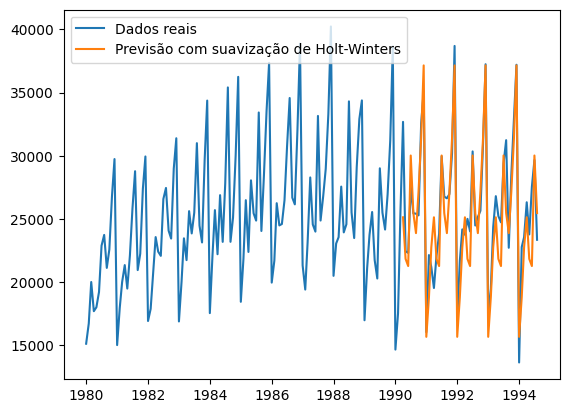

In [ ]:
display(holt_winters_model_fit.mle_retvals)
plt.plot(date_wine_df, label="Dados reais")
plt.plot(holt_winters_results, label="Previsão com suavização de Holt-Winters")
plt.legend()
plt.show()

In [ ]:
display(holt_winters_model_fit.summary())

from sklearn.metrics import r2_score, mean_squared_error

true_data = date_wine_df[train_size:]

r2 = r2_score(true_data, holt_winters_results)
mse = mean_squared_error(true_data, holt_winters_results)

print(f"Coeficiente R² = {r2}")
print(f"Erro quadrático médio = {mse}")

Dep. Variable:,wine_sales,No. Observations:,123
Model:,ExponentialSmoothing,SSE,561629914.444
Optimized:,True,AIC,1914.103
Trend:,None,BIC,1953.473
Seasonal:,Additive,AICC,1919.235
Seasonal Periods:,12,Date:,"Fri, 11 Oct 2024"
Box-Cox:,False,Time:,23:18:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0992857,alpha,True
smoothing_seasonal,0.5629464,gamma,True


Coeficiente R² = 0.7772108192989604
Erro quadrático médio = 5997102.399057463


In [ ]:
from statsmodels.tsa.stattools import acf
import numpy as np

autocorr = acf(normalized_data)
probable_season_period = np.where((autocorr > 0.5) & (autocorr < 1))[0][0]
print(f"Se a série for sazonal, então o período dela provavelmente vale m = {probable_season_period}")

Se a série for sazonal, então o período dela provavelmente vale m = 12


In [ ]:
from pmdarima import auto_arima

maximum_param = 10

# Incluir out_of_sample_size=30 habilita cross-validation
model = auto_arima(train_data, out_of_sample_size=int(0.3*train_size), max_p=maximum_param, max_q=maximum_param, max_P=maximum_param, max_Q=maximum_param, max_order=None, seasonal=True, m=12)

print(f"Modelo obtido é o {model}")
model.summary()

Modelo obtido é o  ARIMA(1,1,2)(0,1,2)[12]          


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  123
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1028.174
Date:                            Fri, 11 Oct 2024   AIC                           2068.347
Time:                                    23:19:46   BIC                           2084.550
Sample:                                         0   HQIC                          2074.919
                                            - 123                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2170      0.404      0.537      0.591      -0.574       1.008
ma.L1         -0.7208      0.418     -1.726      0.084      -1.539       0.098
ma.L2          0.0120      0.218      0.055      0.956      -0.416       0.440
ma.S.L12      -0.1708      0.073     -2.347      0.019      -0.313      -0.028
ma.S.L24      -0.1077      0.061     -1.766      0.077      -0.227       0.012
sigma2      5.056e+06   3.76e+05     13.433      0.000    4.32e+06    5.79e+06
===================================================================================
Ljung-Box (L1) (Q):                   3.77   Jarque-Bera (JB):                17.88
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                            -0.57
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Meh


DatetimeIndex(['1990-04-01', '1990-05-01', '1990-06-01', '1990-07-01',
               '1990-08-01', '1990-09-01', '1990-10-01', '1990-11-01',
               '1990-12-01', '1991-01-01', '1991-02-01', '1991-03-01',
               '1991-04-01', '1991-05-01', '1991-06-01', '1991-07-01',
               '1991-08-01', '1991-09-01', '1991-10-01', '1991-11-01',
               '1991-12-01', '1992-01-01', '1992-02-01', '1992-03-01',
               '1992-04-01', '1992-05-01', '1992-06-01', '1992-07-01',
               '1992-08-01', '1992-09-01', '1992-10-01', '1992-11-01',
               '1992-12-01', '1993-01-01', '1993-02-01', '1993-03-01',
               '1993-04-01', '1993-05-01', '1993-06-01', '1993-07-01',
               '1993-08-01', '1993-09-01', '1993-10-01', '1993-11-01',
               '1993-12-01', '1994-01-01', '1994-02-01', '1994-03-01',
               '1994-04-01', '1994-05-01', '1994-06-01', '1994-07-01',
               '1994-08-01'],
              dtype='datetime64[ns]', freq=None

,wine_sales
1990-04-01,25754.305376
1990-05-01,21909.097707
1990-06-01,20579.669260
1990-07-01,29097.568685
1990-08-01,25341.241860


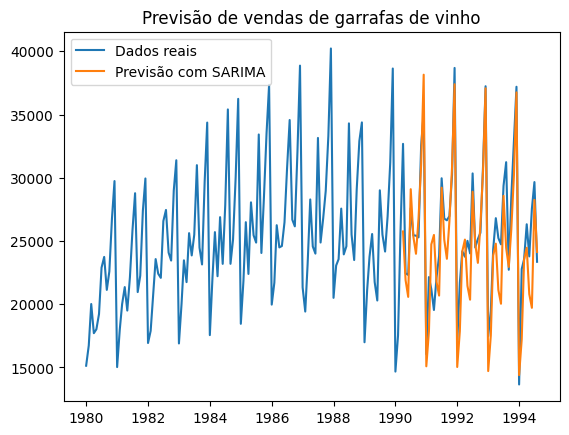

In [ ]:
sarima_result = model.predict(n_periods=forecast_range_length)

if type(sarima_result) is not pd.Series:
  print("Meh")
  shifted_index = date_wine_df.index.shift(train_size, freq='ME').shift(1, freq='D')[:forecast_range_length]
  display(shifted_index)
  sarima_result = pd.DataFrame({'wine_sales': sarima_result}, index=shifted_index)

display(sarima_result.head())

plt.plot(date_wine_df, label="Dados reais")
plt.plot(sarima_result, label="Previsão com SARIMA")
plt.title("Previsão de vendas de garrafas de vinho")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

true_data = date_wine_df[train_size:]

r2 = r2_score(true_data, sarima_result)
mse = mean_squared_error(true_data, sarima_result)

print(f"Coeficiente R² = {r2}")
print(f"Erro quadrático médio = {mse}")

Coeficiente R² = 0.6942737046541386
Erro quadrático médio = 8229627.190621741


In [ ]:
date_wine_df.index.shift(len(date_wine_df.index), freq='M').strftime("%b %Y")[:6]

<ipython-input-17-150c832c2542>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_wine_df.index.shift(len(date_wine_df.index), freq='M').strftime("%b %Y")[:6]


Index(['Aug 1994', 'Sep 1994', 'Oct 1994', 'Nov 1994', 'Dec 1994', 'Jan 1995'], dtype='object')

In [ ]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

ets_model = ETSModel(train_data.wine_sales, seasonal='add', seasonal_periods=12)
ets_model_fit = ets_model.fit(optimized=True)
ets_results = ets_model_fit.forecast(forecast_range_length)
display(ets_results.head())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


,simulation
1990-04-01,25163.504781
1990-05-01,21492.064330
1990-06-01,20547.420486
1990-07-01,29747.218517
1990-08-01,25620.104496


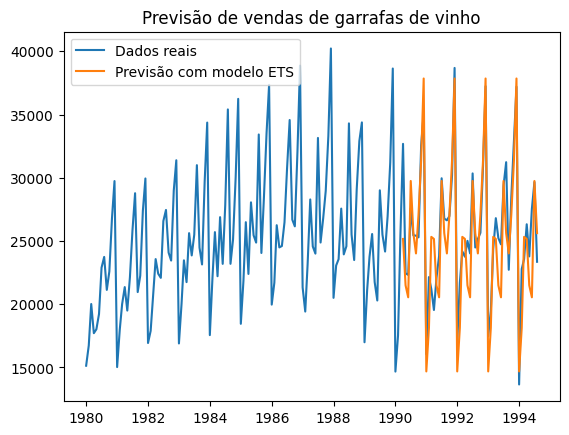

In [ ]:
plt.plot(date_wine_df, label="Dados reais")
plt.plot(ets_results, label="Previsão com modelo ETS")
plt.title("Previsão de vendas de garrafas de vinho")
plt.legend()
plt.show()

In [ ]:
r2 = r2_score(true_data, ets_results)
mse = mean_squared_error(true_data, ets_results)

print(f"Coeficiente R² = {r2}")
print(f"Erro quadrático médio = {mse}")

Coeficiente R² = 0.728137146272029
Erro quadrático médio = 7318081.457889287
